In [64]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
#!pip install mlxtend  
from mlxtend.preprocessing import minmax_scaling
#!pip install biomart
import biomart

In [2]:
raw_dat = pd.read_csv('Breast_GSE45827.csv')

In [3]:
raw_dat.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [24]:
nrow, ncol = raw_dat.shape
print(f'This dataset has {nrow} samples and {ncol} genes.')

This dataset has 151 samples and 54677 genes.


### Check for missingness

In [18]:
for i in range(len(raw_dat)):
    if raw_dat.iloc[:,i].isna().sum() != 0:
        print(f'{raw_dat.columns[i]} has {raw_dat.iloc[:,i].isna().sum()} missing values')

No missing value.

### Check for types and distribution

In [28]:
a = raw_dat.type.value_counts()
a

basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: type, dtype: int64

There are 6 types of breast cancers in this dataset, includes 41 basal, 30 HER, 30 luminal_B, 29 luminal_A, 14 cell_line, and 7 normal ones. We need to explore each one later.

<BarContainer object of 6 artists>

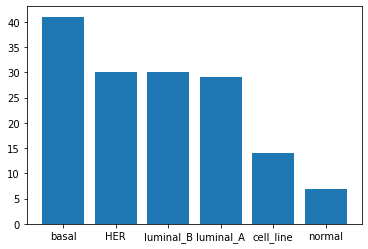

In [29]:
plt.bar(a.index, a)

### Scaling the data

Each gene column is scaled to [0,1] using formula Xsc = (X−Xmin)/(Xmax−Xmin).

<AxesSubplot:>

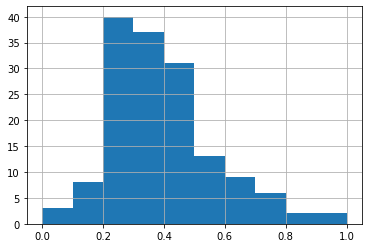

In [53]:
dat = raw_dat.loc[:, ~raw_dat.columns.isin(['samples', 'type'])]
dat = minmax_scaling(dat, columns = dat.columns)
dat['1316_at'].hist()

In [54]:
dat.head(15)

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,0.562294,0.594520,0.461277,0.413825,0.315540,0.457464,0.185234,0.237430,0.637997,0.000000,...,0.311625,0.418857,0.199085,0.221831,0.117509,0.182243,0.124503,0.396006,0.242731,0.708713
1,0.565008,0.624829,0.638405,0.604744,0.456949,0.670148,0.281970,0.327875,0.497372,0.087596,...,0.284087,0.398884,0.275012,0.215984,0.228454,0.254829,0.229114,0.341838,0.450726,0.246678
2,0.623076,0.816796,0.270016,0.606032,0.429293,0.355424,0.097582,0.246094,0.707751,0.077058,...,0.255341,0.360519,0.168370,0.080437,0.135304,0.223239,0.183150,0.193939,0.291606,0.429852
3,0.539950,0.398081,0.476398,0.203472,0.494749,0.753674,0.492729,0.319419,0.657319,0.009465,...,0.247876,0.357514,0.269214,0.245959,0.193033,0.229037,0.162878,0.506311,0.261869,0.651694
4,0.456358,0.501303,0.536045,0.402572,0.480984,0.692044,0.423611,0.245698,0.705469,0.025187,...,0.281456,0.422683,0.314633,0.271777,0.150080,0.188584,0.193738,0.378300,0.169604,0.498685
5,0.000000,0.781443,0.408612,0.327250,0.267192,0.812428,0.447464,0.266855,0.455546,0.050506,...,0.341308,0.486621,0.339493,0.263798,0.149824,0.152579,0.159580,0.129344,0.381851,0.349982
6,0.699556,0.816123,0.240725,0.143275,0.395735,0.262553,0.447833,0.249881,0.008366,0.048692,...,0.322550,0.464146,0.308716,0.253413,0.155840,0.165347,0.199732,0.198731,0.372621,0.262451
7,0.643995,0.518979,0.538077,0.165998,0.445867,0.664351,0.266000,0.457860,0.663742,0.097857,...,0.263968,0.362842,0.322052,0.240498,0.204345,0.245856,0.249047,0.246849,0.155229,0.402109
8,0.659674,0.514704,0.544860,0.267729,0.444686,0.459171,0.306326,0.360252,0.522214,0.050852,...,0.323945,0.445464,0.360431,0.356169,0.212160,0.199495,0.263290,0.405986,0.398419,0.304527
9,0.371173,0.579995,0.803158,0.154085,0.268301,0.710983,0.449950,0.281072,0.786183,0.034668,...,0.274364,0.402955,0.187744,0.209279,0.144480,0.141401,0.178625,0.116599,0.188485,1.000000


In [61]:
data = pd.concat([raw_dat.iloc[:,[0,1]], dat], axis= 1)
data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,0.562294,0.594520,0.461277,0.413825,0.315540,0.457464,0.185234,0.237430,...,0.311625,0.418857,0.199085,0.221831,0.117509,0.182243,0.124503,0.396006,0.242731,0.708713
1,85,basal,0.565008,0.624829,0.638405,0.604744,0.456949,0.670148,0.281970,0.327875,...,0.284087,0.398884,0.275012,0.215984,0.228454,0.254829,0.229114,0.341838,0.450726,0.246678
2,87,basal,0.623076,0.816796,0.270016,0.606032,0.429293,0.355424,0.097582,0.246094,...,0.255341,0.360519,0.168370,0.080437,0.135304,0.223239,0.183150,0.193939,0.291606,0.429852
3,90,basal,0.539950,0.398081,0.476398,0.203472,0.494749,0.753674,0.492729,0.319419,...,0.247876,0.357514,0.269214,0.245959,0.193033,0.229037,0.162878,0.506311,0.261869,0.651694
4,91,basal,0.456358,0.501303,0.536045,0.402572,0.480984,0.692044,0.423611,0.245698,...,0.281456,0.422683,0.314633,0.271777,0.150080,0.188584,0.193738,0.378300,0.169604,0.498685


### Translate Affy Probe ID to official gene symbol

In [63]:
print(data.columns[2:])

Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=54675)


In [67]:
pd.DataFrame(data.columns[2:]).to_csv('affy_ids.csv',index=False)

Pass this list of Affymatrix Probe IDs to DAVID conversion tool (https://david.ncifcrf.gov/conversion.jsp) and recieve a txt file with Affy ids, Official symbol, and gene name.

In [76]:
david = pd.read_csv('DAVID_id_convertion.txt', sep = '\t')
david.head()

,From,To,Species,Gene Name
0,216232_s_at,GCN1,Homo sapiens,GCN1 activator of EIF2AK4(GCN1)
1,220116_at,KCNN2,Homo sapiens,potassium calcium-activated channel subfamily ...
2,219127_at,PRR15L,Homo sapiens,proline rich 15 like(PRR15L)
3,225804_at,CYB5D2,Homo sapiens,cytochrome b5 domain containing 2(CYB5D2)
4,1557848_at,LINC02401,Homo sapiens,long intergenic non-protein coding RNA 2401(LI...


In [77]:
rows, cols = david.shape
print(f'The DAVID id conversion dataset has {rows} genes and {cols} columns.')

The DAVID id conversion dataset has 44580 genes and 4 columns.


As we can see, not all of our Affymetrix ids are found in David and have an Official gene symbol. We combine these successfully converted gene symbols to the original dataframe and left the affy ids which do not have a corresponding official gene symbol as 'N/A'.

In [80]:
gene_name_df = david.iloc[:,0:2]
gene_name_df.columns = ['Affy', 'Official']
gene_name_df.head()

,Affy,Official
0,216232_s_at,GCN1
1,220116_at,KCNN2
2,219127_at,PRR15L
3,225804_at,CYB5D2
4,1557848_at,LINC02401


In [93]:
d = data.transpose()
d.reset_index(inplace=True)
d = d.merge(gene_name_df, left_on='index', right_on = 'Affy',how='left')

In [103]:
cols = d.columns.to_list()
cols = cols[-1:] + cols[:-2]
d = d[cols]

In [105]:
d.set_index('index')

,Official,0,1,2,3,4,5,6,7,8,...,141,142,143,144,145,146,147,148,149,150
index,,,,,,,,,,,,,,,,,,,,,
samples,NaN,84,85,87,90,91,92,93,94,99,...,218,219,226,227,229,230,233,236,237,238
type,NaN,basal,basal,basal,basal,basal,basal,basal,basal,basal,...,luminal_B,luminal_B,luminal_B,luminal_B,luminal_B,luminal_B,luminal_B,luminal_B,luminal_B,luminal_B
1007_s_at,DDR1,0.562294,0.565008,0.623076,0.53995,0.456358,0.0,0.699556,0.643995,0.659674,...,0.706023,0.80328,0.777514,0.665017,0.683597,0.692425,0.82151,0.844587,0.704838,0.921026
1053_at,RFC2,0.59452,0.624829,0.816796,0.398081,0.501303,0.781443,0.816123,0.518979,0.514704,...,0.404001,0.404798,0.564483,0.368856,0.345516,0.392051,0.678679,0.351337,0.442632,0.403955
117_at,HSPA6,0.461277,0.638405,0.270016,0.476398,0.536045,0.408612,0.240725,0.538077,0.54486,...,0.560033,0.493701,0.422908,0.553719,0.955468,0.578978,0.317461,0.427956,0.333465,0.313114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,NaN,0.182243,0.254829,0.223239,0.229037,0.188584,0.152579,0.165347,0.245856,0.199495,...,0.693654,0.811782,0.706884,0.452772,0.575589,0.170497,0.58181,0.675196,0.663728,0.352794
AFFX-ThrX-M_at,NaN,0.124503,0.229114,0.18315,0.162878,0.193738,0.15958,0.199732,0.249047,0.26329,...,0.60758,0.719401,0.632244,0.512904,0.587405,0.395767,0.582291,0.628209,0.578359,0.447881
AFFX-TrpnX-3_at,NaN,0.396006,0.341838,0.193939,0.506311,0.3783,0.129344,0.198731,0.246849,0.405986,...,0.357388,0.37897,0.184381,0.37771,0.259752,0.202717,0.333408,0.597221,0.484101,0.557236


In [107]:
data = d.transpose()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54667,54668,54669,54670,54671,54672,54673,54674,54675,54676
Official,NaN,NaN,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
index,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,0.562294,0.59452,0.461277,0.413825,0.31554,0.457464,0.185234,0.23743,...,0.311625,0.418857,0.199085,0.221831,0.117509,0.182243,0.124503,0.396006,0.242731,0.708713
1,85,basal,0.565008,0.624829,0.638405,0.604744,0.456949,0.670148,0.28197,0.327875,...,0.284087,0.398884,0.275012,0.215984,0.228454,0.254829,0.229114,0.341838,0.450726,0.246678
2,87,basal,0.623076,0.816796,0.270016,0.606032,0.429293,0.355424,0.097582,0.246094,...,0.255341,0.360519,0.16837,0.080437,0.135304,0.223239,0.18315,0.193939,0.291606,0.429852


In [114]:
columns = data.loc['index']
df = pd.DataFrame(data.values, columns=columns)
df = df.drop([1]).reset_index(drop = True)
df.head()

index,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,NaN,NaN,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,84,basal,0.562294,0.59452,0.461277,0.413825,0.31554,0.457464,0.185234,0.23743,...,0.311625,0.418857,0.199085,0.221831,0.117509,0.182243,0.124503,0.396006,0.242731,0.708713
2,85,basal,0.565008,0.624829,0.638405,0.604744,0.456949,0.670148,0.28197,0.327875,...,0.284087,0.398884,0.275012,0.215984,0.228454,0.254829,0.229114,0.341838,0.450726,0.246678
3,87,basal,0.623076,0.816796,0.270016,0.606032,0.429293,0.355424,0.097582,0.246094,...,0.255341,0.360519,0.16837,0.080437,0.135304,0.223239,0.18315,0.193939,0.291606,0.429852
4,90,basal,0.53995,0.398081,0.476398,0.203472,0.494749,0.753674,0.492729,0.319419,...,0.247876,0.357514,0.269214,0.245959,0.193033,0.229037,0.162878,0.506311,0.261869,0.651694


In [115]:
df.to_csv('post_EDA.csv')